In [ ]:
!pip install --upgrade google-api-python-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.164.0
    Uninstalling google-api-python-client-2.164.0:
      Successfully uninstalled google-api-python-client-2.164.0


In [ ]:
import pandas as pd
from googleapiclient.discovery import build
import json
from google.colab import files

In [ ]:
YOUTUBE_API_KEY = "your api key here"

In [ ]:
# EXtract function
def get_trending_videos(region_code='IN', max_results=50):
    youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

    request = youtube.videos().list(
        part='snippet,statistics',
        chart='mostPopular',
        regionCode=region_code,
        maxResults=max_results
    )

    response = request.execute()

    return response['items']


In [ ]:
# Pull trending videos for the India
trending_data = get_trending_videos(region_code='IN')

# Check how many videos were pulled
print(f"Fetched {len(trending_data)} videos.")


Fetched 50 videos.


In [ ]:
#first video's data
import pprint
pprint.pprint(trending_data[0])

{'etag': '9MTcxilYGwUvXa_oGKQdPu4NYFA',
 'id': 'ZsZxyyEmGlk',
 'kind': 'youtube#video',
 'snippet': {'categoryId': '24',
             'channelId': 'UCLtCejNl8eAg4PO_9lf2TIg',
             'channelTitle': 'Anand Audio',
             'defaultAudioLanguage': 'kn',
             'description': 'Presenting The Official Teaser Kannada '
                            '#45TheMovie Starring : Dr.Shivarajkumar, Upendra, '
                            'Raj B Shetty & Others Exclusive Only On Anand '
                            'Audio Official Youtube Channel..!!! \n'
                            '----------------------------------------------------------\n'
                            '#45themovie #45kannada #officialteaser #teaser '
                            '#newteaser #arjunjanya #drshivarajkumar #upendra '
                            '#rajbshetty #rahuldito #kannadamovieteaser '
                            '#kannadanewmovie #2025newmovie #kannadabigmovie '
                            '#mrameshre

In [ ]:
# Transform function
def transform_trending_data(raw_data):
    videos = []

    for video in raw_data:
        snippet = video.get('snippet', {})
        stats = video.get('statistics', {})

        videos.append({
            'video_id': video.get('id'),
            'title': snippet.get('title'),
            'channel_title': snippet.get('channelTitle'),
            'published_at': snippet.get('publishedAt'),
            'category_id': snippet.get('categoryId'),
            'view_count': stats.get('viewCount'),
            'like_count': stats.get('likeCount'),
            'comment_count': stats.get('commentCount'),
        })

    df = pd.DataFrame(videos)

    # Convert numerical columns from strings to integers (if they exist)
    for col in ['view_count', 'like_count', 'comment_count']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

In [ ]:
# Apply transform function
df_trending = transform_trending_data(trending_data)
df_trending.head()

,video_id,title,channel_title,published_at,category_id,view_count,like_count,comment_count
0,ZsZxyyEmGlk,45 Official Teaser Kannada | Dr.Shivarajkumar ...,Anand Audio,2025-03-30T13:15:50Z,24,2119794,50313,2452
1,mpQg4aek_mY,Let's Talk,Ranveer Allahbadia,2025-03-30T05:12:37Z,26,1558097,171291,27392
2,vIJxeEv8MAs,Sikandar Movie REVIEW | Deeksha Sharma,Filmi Indian,2025-03-30T11:18:03Z,24,742698,27625,4928
3,U52FB75fM78,LEHENGE ME LEVIATHAN : DUNIYA KHATAM | Ft. Ins...,Angry Prash,2025-03-30T11:49:40Z,24,595917,82650,2970
4,uVR67RYwYYY,Meem Se Mohabbat - Episode 30 [CC] 27th Mar 20...,HUM TV,2025-03-27T16:01:13Z,24,19073320,403740,11071


In [9]:
df_trending.info()
df_trending.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       50 non-null     object
 1   title          50 non-null     object
 2   channel_title  50 non-null     object
 3   published_at   50 non-null     object
 4   category_id    50 non-null     object
 5   view_count     50 non-null     int64 
 6   like_count     50 non-null     int64 
 7   comment_count  50 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 3.3+ KB


,0
video_id,0
title,0
channel_title,0
published_at,0
category_id,0
view_count,0
like_count,0
comment_count,0


In [ ]:
import sqlite3

# Connect to SQLite DB 
conn = sqlite3.connect("youtube_trending.db")

# Save DataFrame to a table
df_trending.to_sql("trending_videos", conn, if_exists="replace", index=False)
pd.read_sql_query("SELECT * FROM trending_videos LIMIT 5", conn)

,video_id,title,channel_title,published_at,category_id,view_count,like_count,comment_count
0,ZsZxyyEmGlk,45 Official Teaser Kannada | Dr.Shivarajkumar ...,Anand Audio,2025-03-30T13:15:50Z,24,2119794,50313,2452
1,mpQg4aek_mY,Let's Talk,Ranveer Allahbadia,2025-03-30T05:12:37Z,26,1558097,171291,27392
2,vIJxeEv8MAs,Sikandar Movie REVIEW | Deeksha Sharma,Filmi Indian,2025-03-30T11:18:03Z,24,742698,27625,4928
3,U52FB75fM78,LEHENGE ME LEVIATHAN : DUNIYA KHATAM | Ft. Ins...,Angry Prash,2025-03-30T11:49:40Z,24,595917,82650,2970
4,uVR67RYwYYY,Meem Se Mohabbat - Episode 30 [CC] 27th Mar 20...,HUM TV,2025-03-27T16:01:13Z,24,19073320,403740,11071


In [13]:
files.download("youtube_trending.db")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
conn = sqlite3.connect("youtube_trending.db")
df_trending = pd.read_sql_query("SELECT * FROM trending_videos", conn)

<ipython-input-15-0e4fb61aeaa4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_views, x='view_count', y='title', palette='viridis')


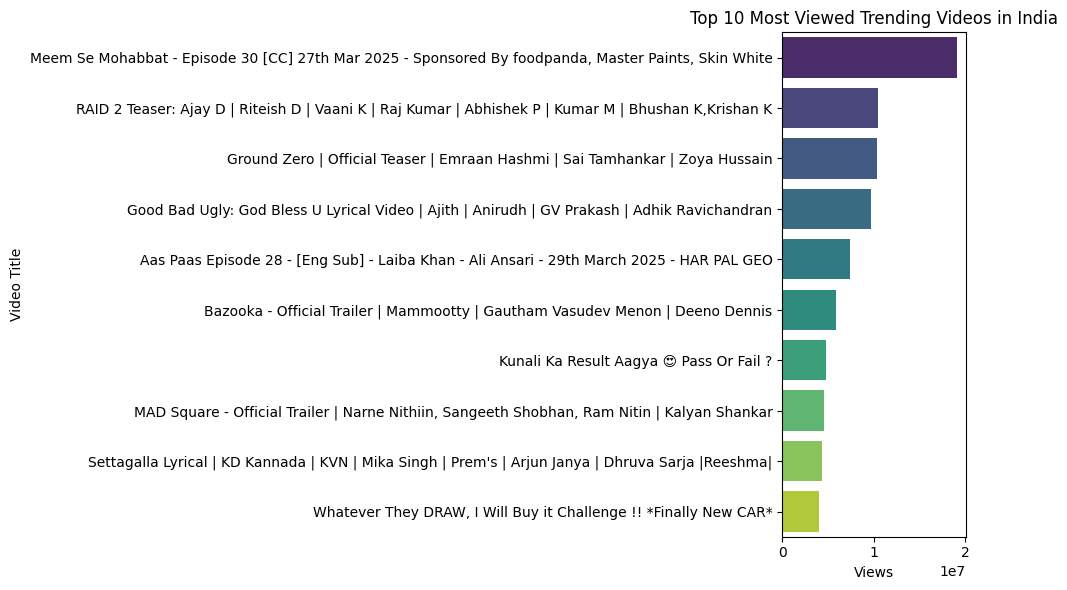

In [15]:
# Visualize top 10 most viewed videos
top_views = df_trending.sort_values(by='view_count', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_views, x='view_count', y='title', palette='viridis')
plt.title('Top 10 Most Viewed Trending Videos in India')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

<ipython-input-16-69eaa4e07b80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_likes, x='like_count', y='title', palette='magma')


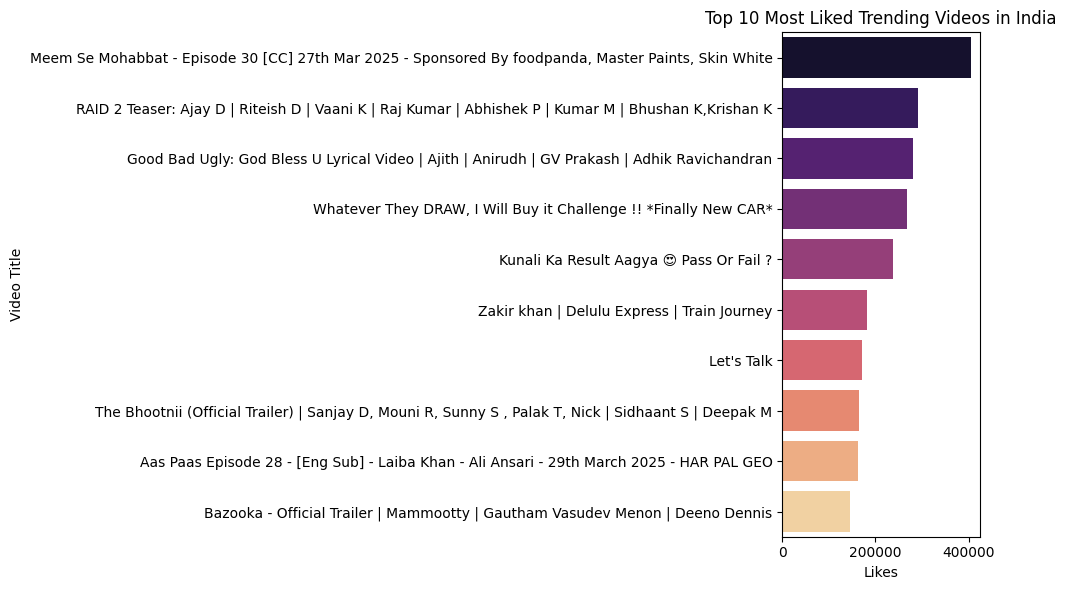

In [16]:
# Visualize top 10 most liked videos
top_likes = df_trending.sort_values(by='like_count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_likes, x='like_count', y='title', palette='magma')
plt.title('Top 10 Most Liked Trending Videos in India')
plt.xlabel('Likes')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

<ipython-input-17-9e253deba01a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='coolwarm')


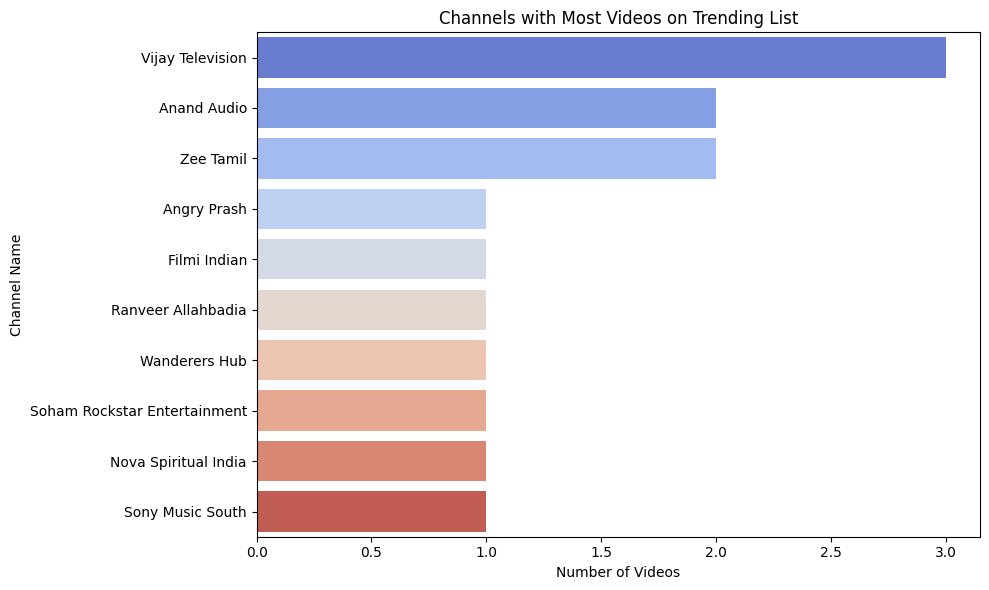

In [17]:
# Visualize top channels by numbers of trending videos
top_channels = df_trending['channel_title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='coolwarm')
plt.title('Channels with Most Videos on Trending List')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Name')
plt.tight_layout()
plt.show()